# Exploratory Data Analysis 
### - StudentID: 
### - Name: Park Yoobin
### - 1st Major:
### - 2nd Major:
<br>
<i> In this project, I tried to find out how respondents' environment and characteristis impact on job satisfaction and their happiness by using GSS dataset. </i>
<br>

#### **Evaluation (Rank evaluation, professor:classmate = 7:3)**
* **Requirements (5 %)**: figures & tables
* **Format (5 %)**: format and sections
* **Logical flow (20 %)**: Is the storyline of EDA report well made?
* **Writing quality (15 %)**: Is the report written in a high quality?
* **Visualization quality (15 %)**: Is the visualized figure create in a high quality?
* **Novelty of suggested solution (10 %)**: Is the suggested solution novel?
* **Appropriateness of suggested solution (10 %)**: Is the suggested solution appropriate?
* **Proofreading (5 %)**: Full credit only if there is no typo or grammar error
* **Comments (15 %)**: Evaluated by professor 
    
</p>

# Setup

## 1. Introduction <br>

The GSS gathers data on contemporary American society in order to monitor and explain trends and constants in attitudes, behaviors, and attributes. Hundreds of trends have been tracked since 1972. In addition, since the GSS adopted questions from earlier surveys, trends can be followed for up to 70 years.

The GSS contains a standard core of demographic, behavioral, and attitudinal questions, plus topics of special interest. Among the topics covered are civil liberties, crime and violence, intergroup tolerance, morality, national spending priorities, psychological well-being, social mobility, and stress and traumatic events.

Altogether the GSS is the single best source for sociological and attitudinal trend data covering the United States. It allows researchers to examine the structure and functioning of society in general as well as the role played by relevant subgroups and to compare the United States to other nations. (Source)

This dataset is a csv version of the Cumulative Data File, a cross-sectional sample of the GSS from 1972-current.

Since the dataset is large, I will define the dtype of each column before reading whole dataset.

## 2. Download & Load packages

In [103]:
# Download packages here if you don't have any
# pip install prettytable
#! pip install missingn
# !pip install dataframe_image

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from prettytable import PrettyTable
import missingno as msno
from PIL import Image, ImageDraw, ImageFont
import dataframe_image as dfi

plt.style.use('seaborn')

rc = {
    "axes.facecolor": "#F6F6F6",
    "figure.facecolor": "#F6F6F6",
    "axes.edgecolor": "#000000",
    "grid.color": "#EBEBE7",
    "font.family": "serif",
    "axes.labelcolor": "#000000",
    "xtick.color": "#000000",
    "ytick.color": "#000000",
    "grid.alpha": 0.4
}

sns.set(rc=rc)

import warnings
warnings.filterwarnings('ignore')

/var/folders/hs/qj17fzlx2zb2j3vmw0stf78r0000gn/T/ipykernel_19625/1833833098.py:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


## 3. Load data

In [2]:
# Load whole dataset
data = pd.read_csv('gss.csv',header = 1)
data

,year,id,wrkstat,Unnamed: 3,hrs1,Unnamed: 5,hrs2,Unnamed: 7,evwork,Unnamed: 9,...,wtss,Unnamed: 11223,wtssnr,Unnamed: 11225,wtssall,Unnamed: 11227,vstrat,Unnamed: 11229,vpsu,Unnamed: 11231
0,1972.0,1.0,1.0,WORKING FULLTIME,-1.0,IAP,-1.0,IAP,NaN,IAP,...,1.000000,NaN,1.000000,NaN,0.444600,NaN,-1.0,IAP,-1.0,IAP
1,1972.0,2.0,5.0,RETIRED,-1.0,IAP,-1.0,IAP,1.0,YES,...,1.000000,NaN,1.000000,NaN,0.889300,NaN,-1.0,IAP,-1.0,IAP
2,1972.0,3.0,2.0,WORKING PARTTIME,-1.0,IAP,-1.0,IAP,NaN,IAP,...,1.000000,NaN,1.000000,NaN,0.889300,NaN,-1.0,IAP,-1.0,IAP
3,1972.0,4.0,1.0,WORKING FULLTIME,-1.0,IAP,-1.0,IAP,NaN,IAP,...,1.000000,NaN,1.000000,NaN,0.889300,NaN,-1.0,IAP,-1.0,IAP
4,1972.0,5.0,7.0,KEEPING HOUSE,-1.0,IAP,-1.0,IAP,1.0,YES,...,1.000000,NaN,1.000000,NaN,0.889300,NaN,-1.0,IAP,-1.0,IAP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59594,2014.0,2539.0,7.0,KEEPING HOUSE,-1.0,IAP,-1.0,IAP,1.0,YES,...,0.448002,NaN,0.447256,NaN,0.448002,NaN,3166.0,NaN,2.0,NaN
59595,2014.0,2540.0,1.0,WORKING FULLTIME,46.0,NaN,-1.0,IAP,NaN,IAP,...,0.448002,NaN,0.447256,NaN,0.448002,NaN,3166.0,NaN,2.0,NaN
59596,2014.0,2541.0,1.0,WORKING FULLTIME,40.0,NaN,-1.0,IAP,NaN,IAP,...,1.344005,NaN,1.341767,NaN,1.344005,NaN,3166.0,NaN,2.0,NaN
59597,2014.0,2542.0,1.0,WORKING FULLTIME,40.0,NaN,-1.0,IAP,NaN,IAP,...,1.380591,NaN,1.378292,NaN,1.380591,NaN,3166.0,NaN,2.0,NaN


## 4. Describe the original data
* Describes statistics on overall data (sample size, number of variables, data type, data range, distribution, etc.) 

In [3]:
print(f"The original data has {data.shape[0]} rows and {data.shape[1]} columns")

The original data has 59599 rows and 11232 columns


In [4]:
# Define the function that summarizes given dataset
def summary(dataset):
    if dataset.dtypes.any != 'object':
        table = pd.DataFrame(index=dataset.columns)
        table['dtypes'] = dataset.dtypes
        table['count'] = dataset.count()
        table['#unique'] = dataset.nunique()
        table['#missing'] = dataset.isna().sum()
        table['missing%'] = dataset.isna().sum()/len(dataset)* 100
        table = pd.concat([table, dataset.describe().T.drop('count', axis = 1)], axis =1)
    return table

In [5]:
# summary(data).style.background_gradient(cmap = 'YlGnBu')

# Data Preprocess
## 1. Pick up the related variables

Since the data is too large to be displayed at once, I picked some variables for the EDA

* The following variables were picked

**--- Basic information of repondents ---**  
`YEAR`  GSS YEAR FOR THIS RESPONDENT  
`ID` RESPONDENT ID NUMBER  
`SEX` RESPONDENTS SEX  
`AGE` AGE OF RESPONDENT  
`RACE` RACE OF RESPONDENT  
`WRKSTAT` LABOR FORCE STATUS  
`WRKSLF` R SELF‐EMP OR WORKS FOR SOMEBODY  
`RINCOME` RESPONDENTS INCOME  
`REGION` REGION OF INTERVIEW (Assume this as a region where Respondents live)  

**--- Education & income of repondents---**  
`DEGREE` RS HIGHEST DEGREE  
`REALINC` FAMILY INCOME IN CONSTANT \$  
`REALRINC` RS INCOME IN CONSTANT \$  
`INCOME` TOTAL FAMILY INCOME  


**--- How responents feel about his/her life and job---**  
`HAPPY` GENERAL HAPPINESS  
`SATJOB` WORK SATISFACTION  
`SATFIN` SATISFACTION WITH FINANCIAL SITUATION    

* <S> Career outcome will be evaluated by respondents' income, respondent's satisfaction to their job and R's self ranking of social position.


In [424]:
# Make a list of relevant variables
cols = [ 'id', 'year','sex', 'age', 'race', 'wrkstat', 'wrkslf', 'rincome', 'region',
        'degree', 'padeg', 'madeg', 'realinc', 'realrinc', 'income', 
       'happy', 'satfin', 'satjob']

In [425]:
# Make a small dataset composed of relevant variables
df = data[cols]
df

,id,year,sex,age,race,wrkstat,wrkslf,rincome,region,degree,padeg,madeg,realinc,realrinc,income,happy,satfin,satjob
0,1.0,1972.0,2.0,23.0,1.0,1.0,2.0,NaN,3.0,3.0,NaN,7.0,18951.00,NaN,NaN,3.0,3.0,3.0
1,2.0,1972.0,1.0,70.0,1.0,5.0,2.0,NaN,3.0,NaN,NaN,NaN,24366.00,NaN,NaN,3.0,2.0,NaN
2,3.0,1972.0,2.0,48.0,1.0,2.0,2.0,NaN,3.0,1.0,NaN,NaN,24366.00,NaN,NaN,2.0,1.0,2.0
3,4.0,1972.0,2.0,27.0,1.0,1.0,2.0,NaN,3.0,3.0,3.0,1.0,30458.00,NaN,NaN,3.0,3.0,1.0
4,5.0,1972.0,2.0,61.0,1.0,7.0,2.0,NaN,3.0,1.0,NaN,NaN,50763.00,NaN,NaN,2.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59594,2539.0,2014.0,2.0,89.0,1.0,7.0,2.0,NaN,1.0,2.0,1.0,1.0,8868.75,NaN,10.0,2.0,1.0,8.0
59595,2540.0,2014.0,1.0,56.0,1.0,1.0,2.0,12.0,1.0,1.0,1.0,NaN,21285.00,21285.00,12.0,1.0,2.0,1.0
59596,2541.0,2014.0,1.0,24.0,1.0,1.0,2.0,9.0,1.0,1.0,1.0,3.0,21285.00,5321.25,12.0,2.0,2.0,3.0
59597,2542.0,2014.0,1.0,27.0,1.0,1.0,2.0,12.0,1.0,1.0,1.0,1.0,31927.50,17737.50,12.0,2.0,2.0,2.0


## 2. Overview of the dataset with relevant variables

* Describe statistics on overall data (sample size, number of variables, data type, data range, distribution, etc.) 

In [426]:
print(f"The dataset with only relevant variables has {df.shape[0]} rows and {df.shape[1]} columns")

The dataset with only relevant variables has 59599 rows and 18 columns


In [427]:
# Let's summarize the data
table1 = summary(df).style.background_gradient(cmap = 'YlGnBu')
table1

,dtypes,count,#unique,#missing,missing%,mean,std,min,25%,50%,75%,max
id,float64,59599,4510,0,0.000000,1137.341616,830.973829,1.000000,497.000000,1011.000000,1524.000000,4510.000000
year,float64,59599,30,0,0.000000,1993.017534,12.296335,1972.000000,1983.000000,1994.000000,2004.000000,2014.000000
sex,float64,59599,2,0,0.000000,1.558952,0.496517,1.000000,1.000000,2.000000,2.000000,2.000000
age,float64,59599,74,0,0.000000,46.027299,17.734550,18.000000,31.000000,43.000000,59.000000,99.000000
race,float64,59599,3,0,0.000000,1.241715,0.534363,1.000000,1.000000,1.000000,1.000000,3.000000
wrkstat,float64,59599,9,0,0.000000,3.057904,2.457031,1.000000,1.000000,2.000000,5.000000,9.000000
wrkslf,float64,56295,4,3304,5.543717,1.922498,0.610464,1.000000,2.000000,2.000000,2.000000,9.000000
rincome,float64,38450,15,21149,35.485495,13.155865,18.353458,1.000000,8.000000,11.000000,12.000000,99.000000
region,float64,59599,9,0,0.000000,4.905149,2.453449,1.000000,3.000000,5.000000,7.000000,9.000000
degree,float64,46602,6,12997,21.807413,1.728445,1.133675,1.000000,1.000000,1.000000,3.000000,9.000000


In [429]:
# Save this table as image
#dfi.export(table1,"table_1.png")

* There are some columns that have many missing values

<Axes: >

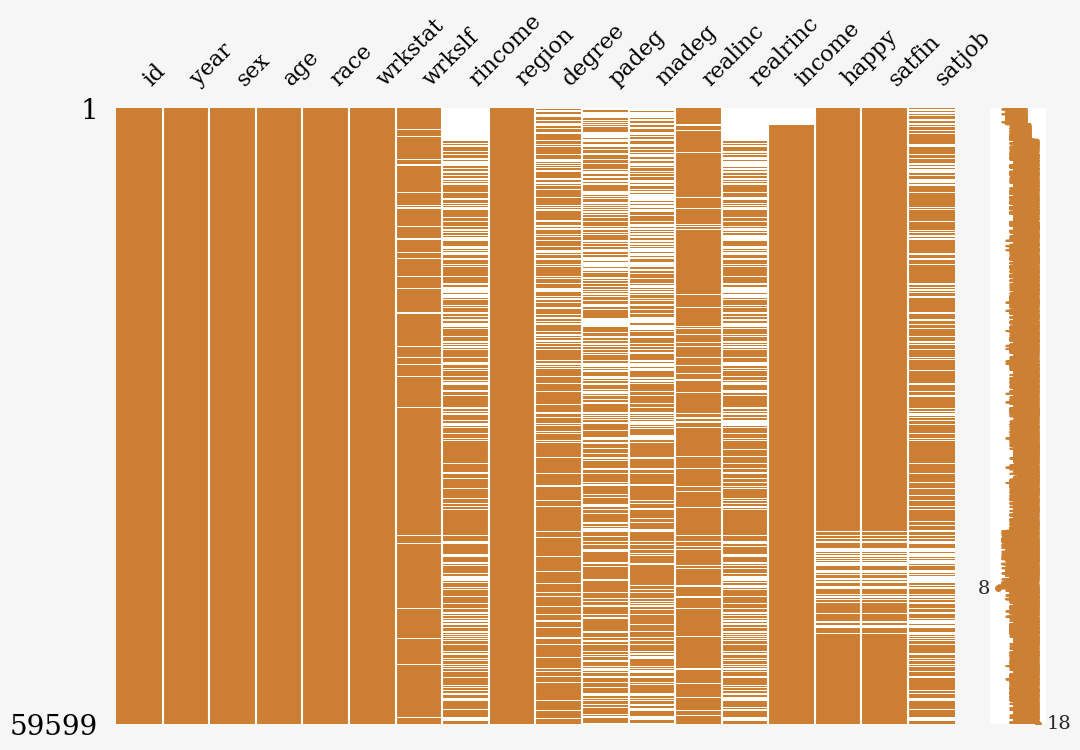

In [430]:
# Visualize missing values
missing_graph = msno.matrix(df = df.iloc[:, :], figsize = (12,8), color = (0.8, 0.5, 0.2))
missing_graph

In [432]:
# Save this graph as image
# fig = missing_graph.get_figure()
# 
fig.savefig('figure_1.png', bbox_inches = 'tight')

## 3. Treating Missing values
### 3.1 What does the data mean?
* Let's see the columns of the original dataset

In [300]:
original_name = pd.read_csv("gss.csv", nrows = 1)
original_name

,GSS YEAR FOR THIS RESPONDENT,RESPONDNT ID NUMBER,LABOR FORCE STATUS,LABOR FORCE STATUS_labels,NUMBER OF HOURS WORKED LAST WEEK,NUMBER OF HOURS WORKED LAST WEEK_labels,NUMBER OF HOURS USUALLY WORK A WEEK,NUMBER OF HOURS USUALLY WORK A WEEK_labels,EVER WORK AS LONG AS ONE YEAR,EVER WORK AS LONG AS ONE YEAR_labels,...,WEIGHT VARIABLE,WEIGHT VARIABLE_labels,WEIGHT VARIABLE.1,WEIGHT VARIABLE_labels.1,WEIGHT VARIABLE.2,WEIGHT VARIABLE_labels.2,Variance stratum,Variance stratum_labels,Variance primary sampling unit,Variance primary sampling unit_labels
0,year,id,wrkstat,NaN,hrs1,NaN,hrs2,NaN,evwork,NaN,...,wtss,NaN,wtssnr,NaN,wtssall,NaN,vstrat,NaN,vpsu,NaN


In [475]:
# Define a function that returns the table that shows data and label
def label_table(df, col_name):
    
    unique_data = sorted(df[col_name].unique())
    
    col_index = df.columns.get_loc(col_name)
    label_index = df.columns.get_loc(col_name) + 1
    
    # Make a table
    #table = pd.DataFrame(columns = [col_name, 'Meaning(Label)'])
    table = PrettyTable()
    table.field_names = [col_name, 'Meaning(Label)']    
    
    for item in unique_data:
        label = df[df[col_name] == item].iloc[:, label_index]
        if label.dtypes == 'object':
            labels = label.unique()

        else:
            labels = col_name
        #table = pd.concat([table, pd.DataFrame({col_name: [item], 'Meaning(Label)': [labels]})]) 
        table.add_row([item, labels])
    
    im = Image.new("RGB", (500, 200), "white")
    draw = ImageDraw.Draw(im)
    # 시간 나면 거지 같은 폰트를 바꾸자!
    # font = ImageFont.truetype(r"Arial.otf", 22)
    # draw.text((10, 10), str(table), font = font, fill="black")
    draw.text((10, 10), str(table), fill="black")
    
    im.save(f"{col_name}_table.png")

    return table, label_dict

In [471]:
# 시간 오래 걸림
# Let's see what the data say!
remove = ['id', 'year', 'age', 'realinc', 'realrinc']
features = [col for col in cols if col not in remove]

print(features)

['sex', 'race', 'wrkstat', 'wrkslf', 'rincome', 'region', 'degree', 'padeg', 'madeg', 'income', 'happy', 'satfin', 'satjob']


In [476]:
total_labels = dict()
for feat in features:
    table, label_dict = label_table(data,feat)
    print(table)

+-----+----------------+
| sex | Meaning(Label) |
+-----+----------------+
| 1.0 |    ['MALE']    |
| 2.0 |   ['FEMALE']   |
+-----+----------------+
+------+----------------+
| race | Meaning(Label) |
+------+----------------+
| 1.0  |   ['WHITE']    |
| 2.0  |   ['BLACK']    |
| 3.0  |   ['OTHER']    |
+------+----------------+
+---------+----------------------+
| wrkstat |    Meaning(Label)    |
+---------+----------------------+
|   1.0   | ['WORKING FULLTIME'] |
|   2.0   | ['WORKING PARTTIME'] |
|   3.0   | ['TEMP NOT WORKING'] |
|   4.0   | ['UNEMPL, LAID OFF'] |
|   5.0   |     ['RETIRED']      |
|   6.0   |      ['SCHOOL']      |
|   7.0   |  ['KEEPING HOUSE']   |
|   8.0   |      ['OTHER']       |
|   9.0   |        [nan]         |
+---------+----------------------+
+--------+-------------------+
| wrkslf |   Meaning(Label)  |
+--------+-------------------+
|  2.0   |  ['SOMEONE ELSE'] |
|  nan   |         []        |
|  1.0   | ['SELF-EMPLOYED'] |
|  8.0   |       ['DK']    

In [478]:
sex_dict = {1.0: 'MALE', 2.0: 'FEMALE'}
race_dict = {1.0: 'WHITE', 2.0: 'BLACK', 3.0: 'OTHER'}
wrkstat_dict = {1.0: 'WORKING FULLTIME', 2.0: 'WORKING PARTTIME', 3.0: 'TEMP NOT WORKING', 4.0: 'UNEMPL, LAID OFF', 5.0: 'RETIRED', 6.0: 'SCHOOL', 7.0: 'KEEPING HOUSE', 8.0: 'OTHER'}
wrkslf_dict = {1.0: 'SELF-EMPLOYED', 2.0: 'SOMEONE ELSE', 8.0: 'DK'}
rincome_dict = {1.0: 'LT $1000', 2.0: '$1000 TO 2999', 3.0: '$3000 TO 3999', 4.0: '$4000 TO 4999', 5.0: '$5000 TO 5999', 6.0: '$6000 TO 6999', 7.0: '$7000 TO 7999', 8.0: '$8000 TO 9999', 9.0: '$10000 - 14999', 10.0: '$15000 - 19999', 11.0: '$20000 - 24999', 12.0: '$25000 OR MORE', 13.0: 'REFUSED', 98.0: 'DK'}
region_dict = {1.0: 'NEW ENGLAND', 2.0: 'MIDDLE ATLANTIC', 3.0: 'E. NOR. CENTRAL', 4.0: 'W. NOR. CENTRAL', 5.0: 'SOUTH ATLANTIC', 6.0: 'E. SOU. CENTRAL', 7.0: 'W. SOU. CENTRAL', 8.0: 'MOUNTAIN', 9.0: 'PACIFIC'}
degree_dict = {1.0: 'HIGH SCHOOL', 2.0: 'JUNIOR COLLEGE', 3.0: 'BACHELOR', 4.0: 'GRADUATE', 8.0: 'DK'}
padeg_dict = {1.0: 'HIGH SCHOOL', 2.0: 'JUNIOR COLLEGE', 3.0: 'BACHELOR', 4.0: 'GRADUATE', 7.0: 'IAP', 8.0: 'DK'}
madeg_dict = {1.0: 'HIGH SCHOOL', 2.0: 'JUNIOR COLLEGE', 3.0: 'BACHELOR', 4.0: 'GRADUATE', 7.0: 'IAP', 8.0: 'DK'}
income_dict = {1.0: 'LT $1000', 2.0: '$1000 TO 2999', 3.0: '$3000 TO 3999', 4.0: '$4000 TO 4999', 5.0: '$5000 TO 5999', 6.0: '$6000 TO 6999', 7.0: '$7000 TO 7999', 8.0: '$8000 TO 9999', 9.0: '$10000 - 14999', 10.0: '$15000 - 19999', 11.0: '$20000 - 24999', 12.0: '$25000 OR MORE', 13.0: 'REFUSED', 98.0: 'DK'}
happy_dict = {1.0: 'VERY HAPPY', 2.0: 'PRETTY HAPPY', 3.0: 'NOT TOO HAPPY', 8.0: 'DK'}
satfin_dict = {1.0: 'SATISFIED', 2.0: 'MORE OR LESS', 3.0: 'NOT AT ALL SAT', 8.0: 'DK'}
satjob_dict = {1.0: 'VERY SATISFIED', 2.0: 'MOD. SATISFIED', 3.0: 'A LITTLE DISSAT', 4.0: 'VERY DISSATISFIED', 8.0: 'DK'}

# 각 변수의 딕셔너리를 딕셔너리의 딕셔너리로 묶기
variable_dicts = {
    'sex': sex_dict,
    'race': race_dict,
    'wrkstat': wrkstat_dict,
    'wrkslf': wrkslf_dict,
    'rincome': rincome_dict,
    'region': region_dict,
    'degree': degree_dict,
    'padeg': padeg_dict,
    'madeg': madeg_dict,
    'income': income_dict,
    'happy': happy_dict,
    'satfin': satfin_dict,
    'satjob': satjob_dict
}

### 3.2 Removing missing values

In [434]:
# Let's remove the Nan values from the dataset

# remove NaN
df_clean = df.dropna()

# Let's remove the rows with numbers that means 'IAP'(invalid response), 'DK'(don't know)', and 'nan'
df_clean = df_clean[~df_clean['wrkstat'].isin([9.0])]
df_clean = df_clean[~df_clean['wrkslf'].isin([8.0, 9.0])]
df_clean = df_clean[~df_clean['rincome'].isin([13.0, 98.0, 99.0])]
df_clean = df_clean[~df_clean['degree'].isin([8.0, 9.0])]
df_clean = df_clean[~df_clean['padeg'].isin([7.0, 8.0, 9.0])]
df_clean = df_clean[~df_clean['madeg'].isin([7.0, 8.0, 9.0])]
df_clean = df_clean[~df_clean['income'].isin([13.0, 98.0, 99.0])]
df_clean = df_clean[~df_clean['satfin'].isin([8.0, 9.0])]
df_clean = df_clean[~df_clean['happy'].isin([8.0, 9.0])]
df_clean = df_clean[~df_clean['satjob'].isin([8.0, 9.0])]
df_clean = df_clean[(df_clean['age'] >= 18) & (df_clean['age'] <= 89)]

In [435]:
df_clean

,id,year,sex,age,race,wrkstat,wrkslf,rincome,region,degree,padeg,madeg,realinc,realrinc,income,happy,satfin,satjob
3149,33.0,1974.0,2.0,21.0,1.0,7.0,2.0,3.0,6.0,1.0,1.0,1.0,1234.0,8636.00,1.0,1.0,2.0,4.0
3157,41.0,1974.0,1.0,28.0,1.0,1.0,1.0,9.0,6.0,3.0,1.0,1.0,30841.0,30841.00,9.0,1.0,1.0,1.0
3186,70.0,1974.0,2.0,29.0,1.0,1.0,2.0,9.0,7.0,3.0,2.0,3.0,94738.0,30841.00,12.0,1.0,1.0,1.0
3198,82.0,1974.0,1.0,52.0,1.0,1.0,1.0,11.0,9.0,1.0,1.0,1.0,55515.0,55515.00,11.0,2.0,1.0,2.0
3202,86.0,1974.0,1.0,32.0,1.0,1.0,2.0,9.0,9.0,4.0,2.0,1.0,43178.0,30841.00,10.0,2.0,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59586,2531.0,2014.0,1.0,52.0,1.0,1.0,2.0,12.0,1.0,3.0,1.0,3.0,39022.5,26015.00,12.0,1.0,1.0,1.0
59590,2535.0,2014.0,1.0,62.0,1.0,1.0,2.0,12.0,1.0,1.0,3.0,3.0,21285.0,21285.00,12.0,2.0,2.0,1.0
59596,2541.0,2014.0,1.0,24.0,1.0,1.0,2.0,9.0,1.0,1.0,1.0,3.0,21285.0,5321.25,12.0,2.0,2.0,3.0
59597,2542.0,2014.0,1.0,27.0,1.0,1.0,2.0,12.0,1.0,1.0,1.0,1.0,31927.5,17737.50,12.0,2.0,2.0,2.0


## 4. Data Encoding
* Let's encode target data 'happy' to 'happy'(1), 'not happy'(0)

In [436]:
df_clean['happy'] = df_clean['happy'].map({1.0:1, 2.0:1, 3.0:0})
df_clean

,id,year,sex,age,race,wrkstat,wrkslf,rincome,region,degree,padeg,madeg,realinc,realrinc,income,happy,satfin,satjob
3149,33.0,1974.0,2.0,21.0,1.0,7.0,2.0,3.0,6.0,1.0,1.0,1.0,1234.0,8636.00,1.0,1,2.0,4.0
3157,41.0,1974.0,1.0,28.0,1.0,1.0,1.0,9.0,6.0,3.0,1.0,1.0,30841.0,30841.00,9.0,1,1.0,1.0
3186,70.0,1974.0,2.0,29.0,1.0,1.0,2.0,9.0,7.0,3.0,2.0,3.0,94738.0,30841.00,12.0,1,1.0,1.0
3198,82.0,1974.0,1.0,52.0,1.0,1.0,1.0,11.0,9.0,1.0,1.0,1.0,55515.0,55515.00,11.0,1,1.0,2.0
3202,86.0,1974.0,1.0,32.0,1.0,1.0,2.0,9.0,9.0,4.0,2.0,1.0,43178.0,30841.00,10.0,1,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59586,2531.0,2014.0,1.0,52.0,1.0,1.0,2.0,12.0,1.0,3.0,1.0,3.0,39022.5,26015.00,12.0,1,1.0,1.0
59590,2535.0,2014.0,1.0,62.0,1.0,1.0,2.0,12.0,1.0,1.0,3.0,3.0,21285.0,21285.00,12.0,1,2.0,1.0
59596,2541.0,2014.0,1.0,24.0,1.0,1.0,2.0,9.0,1.0,1.0,1.0,3.0,21285.0,5321.25,12.0,1,2.0,3.0
59597,2542.0,2014.0,1.0,27.0,1.0,1.0,2.0,12.0,1.0,1.0,1.0,1.0,31927.5,17737.50,12.0,1,2.0,2.0


In [437]:
# [save-point]
# df_clean.to_csv('gss_clean_encoded.csv')

# Data Overview (Clean Dataset)
#### Describe statistics on overall data 
## 0. Preparation for data visualization
Let's make a one-tool class for data visualization

In [551]:
class visualization:

    def __init__(self):
        
        self.cont = ['year','age', 'realinc', 'realrinc']
        self.categ = [feat for feat in df_clean.columns if feat not in self.cont and feat not in 'id']
        self.path = 'Desktop/Big data Capstone'
        
    def bar_pie_plot(self, dataset, fname):
        
        cols = self.categ # except 'id' column
        
        ncols = 2
        nrows = len(cols)
        figsize = (10 * ncols, 8 * nrows)

        fig, ax = plt.subplots(figsize = figsize, ncols = ncols, nrows = nrows)
        fig.subplots_adjust(hspace = 0.3, wspace = 0.1)
        
        for i, col in enumerate(cols):
            # pie plot
            data_counts = dataset[col].value_counts()
            pie = data_counts.plot.pie(autopct='%1.1f%%', labels = None,labeldistance = 30, ax=ax[i][1])
            pie.legend(data_counts.index, title=col, loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
            ax[i][1].set_title(f'Data count distribution of {col}')
            
            # bar plot
            sns.countplot(x = col, data = dataset, ax = ax[i][0])
            ax[i][0].set_title(f'Count plot - {col}') 
            
            x_labels = [variable_dicts[col].get(val, val) for val in dataset[col].unique()]
            ax[i][0].set_xticklabels(x_labels, rotation=45, ha='right', fontsize=8)

        
        plt.savefig(fname, bbox_inches = 'tight')    
        plt.show()
        
    def histplot(self, dataset, fname):
        
        cols = self.cont
        
        ncols = len(cols)
        nrows = 1
        figsize = (12 * ncols, 10 * nrows)
        
        fig,ax = plt.subplots(figsize = figsize , ncols = ncols , nrows = nrows)
        fig.subplots_adjust(hspace = 0.5, wspace = 0.5)
        
        ax = ax.flatten()
        
        for i, col in enumerate(cols):
            bins = max(dataset[col].nunique() // 30, 30)
            
            sns.histplot(data = dataset, x = col, bins = bins, stat = 'percent', kde = True, ax = ax[i])
            
            ax[i].set_title(col)
        
        plt.savefig(fname, bbox_inches = 'tight')
        fig.suptitle(f'Histplot of the continuous variables')
    
    def contplot(self, dataset, target, fname):
        
        feature_columns = self.cont
        ncols = 4
        nrows = len(feature_columns)
        figsize = (5 * ncols , 3 * nrows)
        
        fig,ax = plt.subplots(figsize = figsize , ncols = ncols , nrows = nrows)
        ax = ax.flatten()
        fig.subplots_adjust(hspace = 0.5, wspace = 0.5)
        
       
        colors = ['dodgerblue','salmon']
        method = ['histplot','violin','boxplot', 'barplot']
        
        labels = dataset[target].unique()
        
        base = 0 
        
        for col in feature_columns:
            
            for num in range(4):
                
                i = base + num 
                
                if num == 0:
                    
                    data_list = [dataset[dataset[target] == label] for label in labels]
        
                    for number,hist_data in enumerate(data_list):

                        if number == 0:
                            label = labels[number]
                            c = colors[number]

                        else:
                            label = labels[number]
                            c = colors[number]
                            
                        bins = max(hist_data[col].nunique() // 30, 30)

                        sns.histplot(data = hist_data, x = col, bins = bins , color = c, stat = 'percent',
                                    label = label , kde = True, ax = ax[i])
                        
                        ax[i].legend(loc = 'upper right')
                        ax[i].set_xlabel('')

                elif num == 1:
                    sns.violinplot(data = dataset , x = target , y = col, palette = colors, ax = ax[i])
                elif num == 2:
                    sns.boxplot(data = dataset , x = target , y = col, palette = colors, ax = ax[i])
                else:
                    sns.barplot(data = dataset , x = target, y = col, palette = colors, ax = ax[i])
                    
                ax[i].set_title(f'{col} {method[num]}')                

            base += ncols
            
            plt.savefig(fname, bbox_inches = 'tight')
            

    def catplot(self, dataset, target, variable_dicts, fname):
        
        feature_columns = [col for col in self.categ if col not in target]
        
        ncols = 2
        nrows = len(feature_columns)
        figsize = (5 * ncols, 3 * nrows)

        fig, ax = plt.subplots(figsize=figsize, ncols=ncols, nrows=nrows)
        ax = ax.flatten()
        fig.subplots_adjust(hspace=1.5, wspace=0.3)

        colors = ['dodgerblue', 'salmon']
        method = ['countplot', 'barplot']

        labels = dataset[target].unique()

        base = 0

        for col in feature_columns:
            for num in range(2):  # 2 types of plots for categorical data

                i = base + num

                if num == 0:
                    sns.countplot(data=dataset, x=col, hue=target, palette=colors, ax=ax[i])
                    ax[i].set_xlabel('')
                    ax[i].set_ylabel('Count')

                else:
                    if col != target:
                        happiness_ratio = dataset.groupby(col)[target].mean()
                        sns.barplot(x=happiness_ratio.index, y=happiness_ratio.values, ax=ax[i])
                        ax[i].set_title(f'Ratio of {target}==1 by {col}')
                        ax[i].set_xlabel('')
                        ax[i].set_ylabel('Happiness Ratio')
                        ax[i].set_ylim(0.5, 1.0)


                
                x_labels = [variable_dicts[col].get(val, val) for val in dataset[col].unique()]
                ax[i].set_xticklabels(x_labels, rotation=45, ha='right', fontsize=8)

                ax[i].set_title(f'{col} {method[num]}')

            base += ncols

        plt.savefig(fname, bbox_inches='tight')


## 1. Sample size

In [545]:
print(f"The dataset without missing values has {df_clean.shape[0]} rows and {df_clean.shape[1]} columns")

The dataset without missing values has 11268 rows and 18 columns


In [439]:
# Let's see how dataset size has reduced
print(f"The original data had {data.shape[0]} rows and {data.shape[1]} columns.")
print(f'{df.shape[0]} rows and {df.shape[1]} columns left after picking up relevant columns.')
print(f"{df_clean.shape[0]} rows and {df_clean.shape[1]} columns left after removing missing values.")

The original data had 59599 rows and 11232 columns.
59599 rows and 18 columns left after picking up relevant columns.
11268 rows and 18 columns left after removing missing values.


## 2. Number of variables, data type, data range

In [440]:
# Summarize the statistics of data without missing values
table2 = summary(df_clean).style.background_gradient(cmap = 'YlGnBu')
table2

,dtypes,count,#unique,#missing,missing%,mean,std,min,25%,50%,75%,max
id,float64,11268,2950,0,0.000000,1118.529198,798.823224,1.000000,480.750000,997.000000,1536.000000,4506.000000
year,float64,11268,28,0,0.000000,1995.720714,11.047892,1974.000000,1987.000000,1996.000000,2006.000000,2014.000000
sex,float64,11268,2,0,0.000000,1.492013,0.499958,1.000000,1.000000,1.000000,2.000000,2.000000
age,float64,11268,67,0,0.000000,37.664448,11.548887,18.000000,28.000000,36.000000,45.000000,89.000000
race,float64,11268,3,0,0.000000,1.144302,0.445819,1.000000,1.000000,1.000000,1.000000,3.000000
wrkstat,float64,11268,5,0,0.000000,1.423944,1.116527,1.000000,1.000000,1.000000,1.000000,7.000000
wrkslf,float64,11268,2,0,0.000000,1.874689,0.331085,1.000000,2.000000,2.000000,2.000000,2.000000
rincome,float64,11268,12,0,0.000000,9.844693,3.078630,1.000000,9.000000,11.000000,12.000000,12.000000
region,float64,11268,9,0,0.000000,5.000532,2.562574,1.000000,3.000000,5.000000,7.000000,9.000000
degree,float64,11268,4,0,0.000000,2.088747,1.155568,1.000000,1.000000,2.000000,3.000000,4.000000


In [441]:
# Save this dataframe as image
# dfi.export(table2,"table_2.png")

# Univariate analysis <br>
Presentation of key variables from various aspects

### 2.1 Data Distribution of categorical data <br>
~~
<figure>
  <img src="bts_google.png" alt="BTS Google Trend"/>
  <figcaption>Figure 1. BTS Google Trend</figcaption>
</figure>

In [552]:
# Initiate an instance for visualization
vis = visualization()

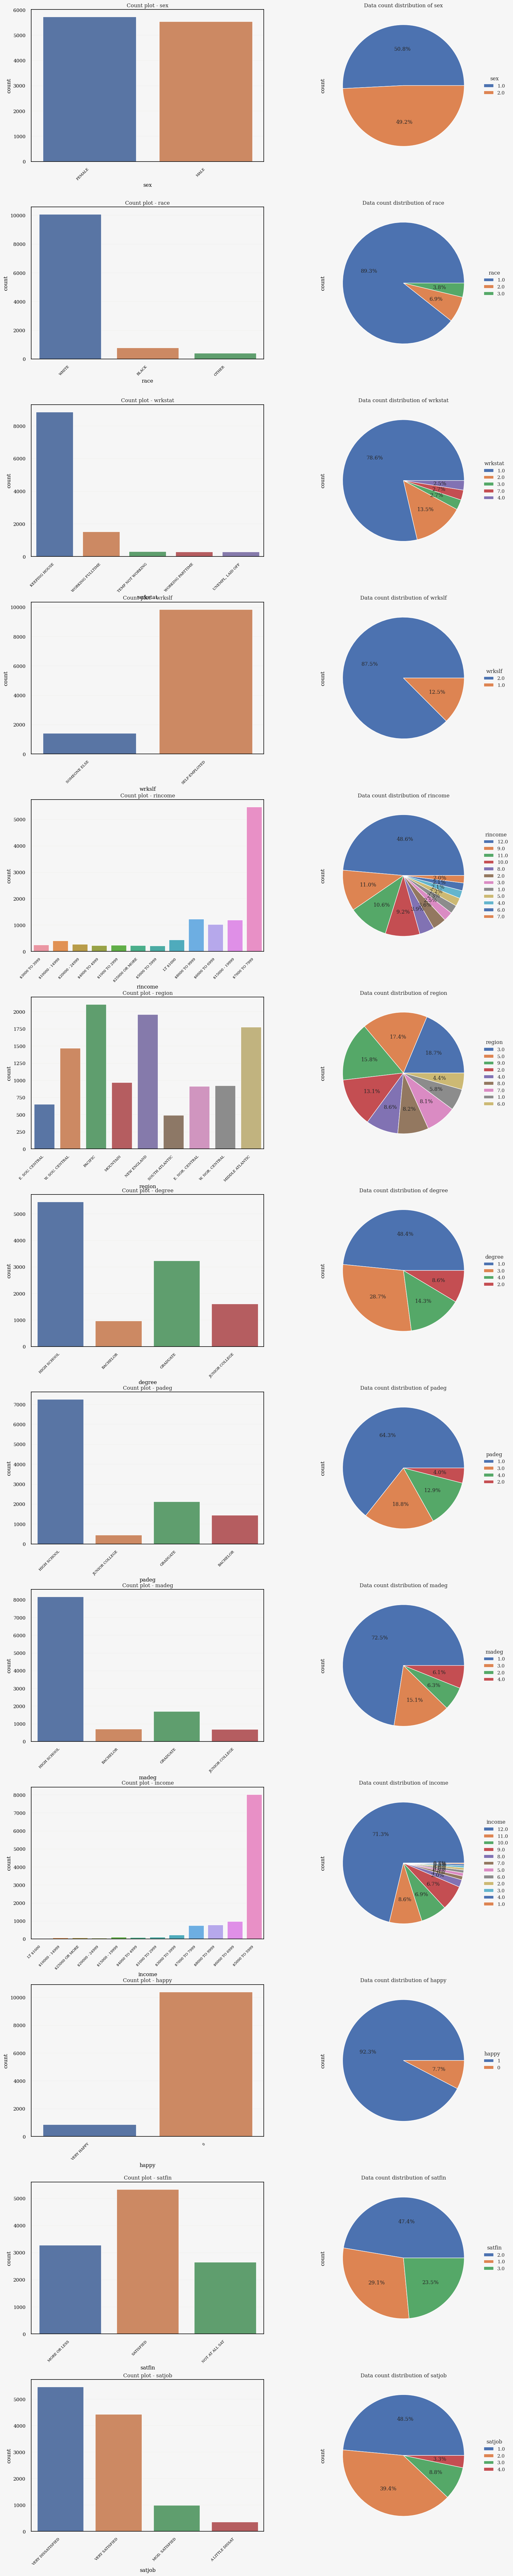

In [553]:
vis.bar_pie_plot(df_clean, 'figure2.png')

### 2.2 Continuous Variables <br>
~~

<br><br>

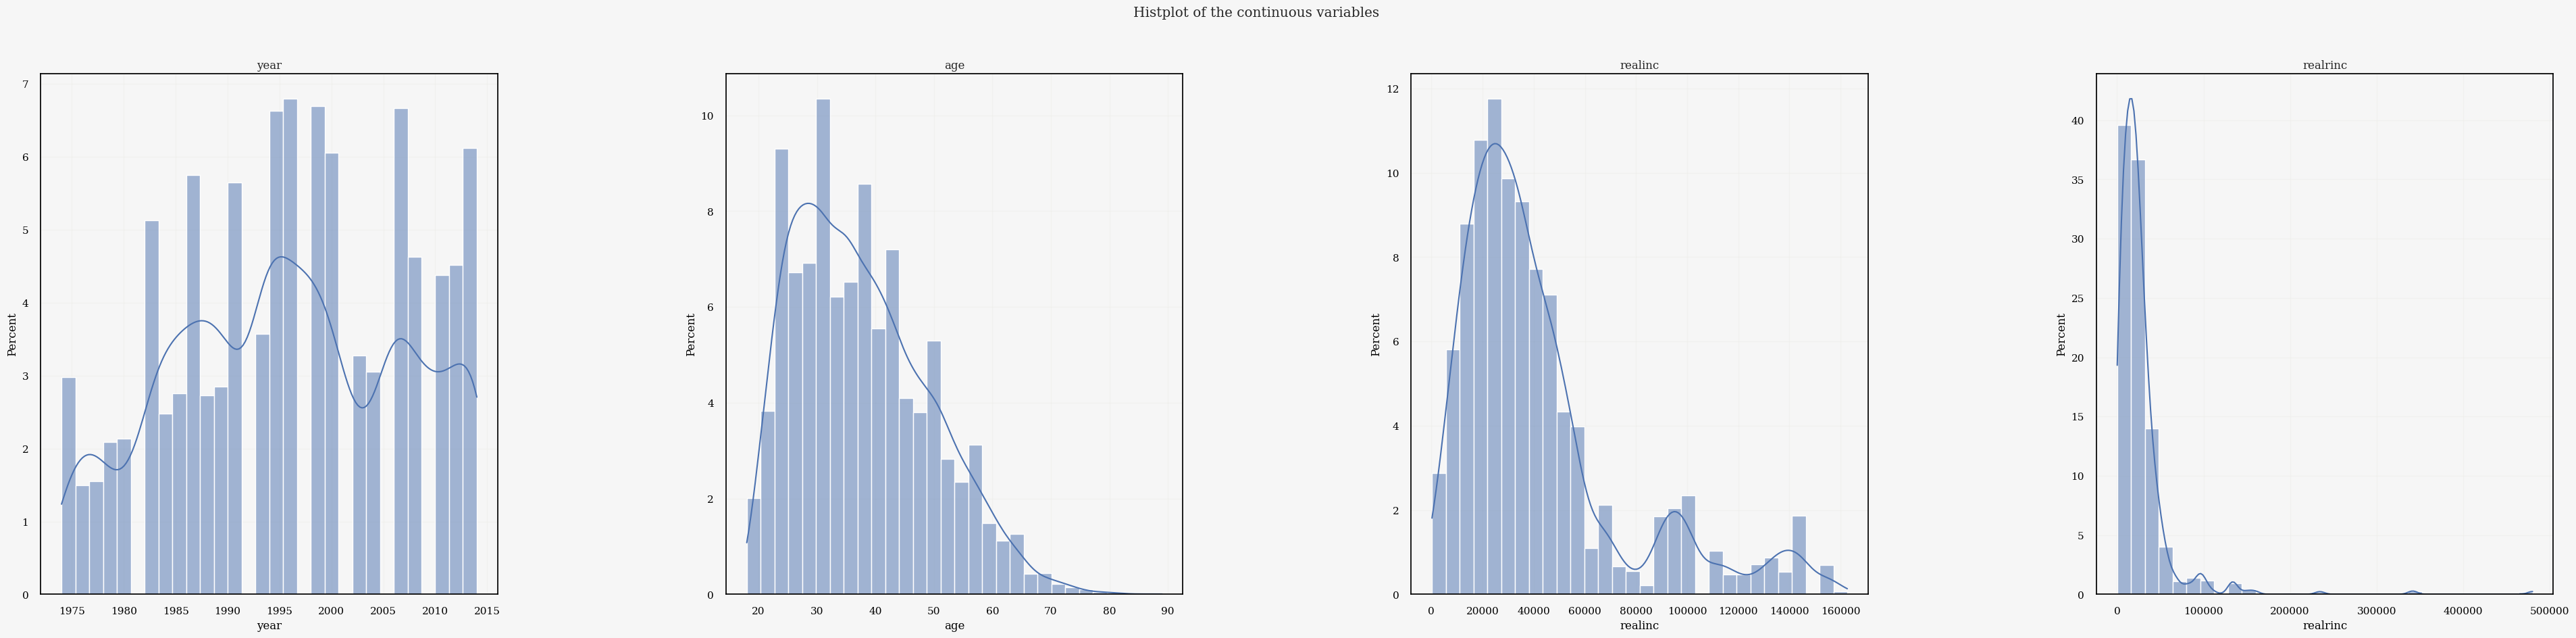

In [452]:
vis.histplot(df_clean, 'figure3.png')

### 2.3. How happiness varies across different variables

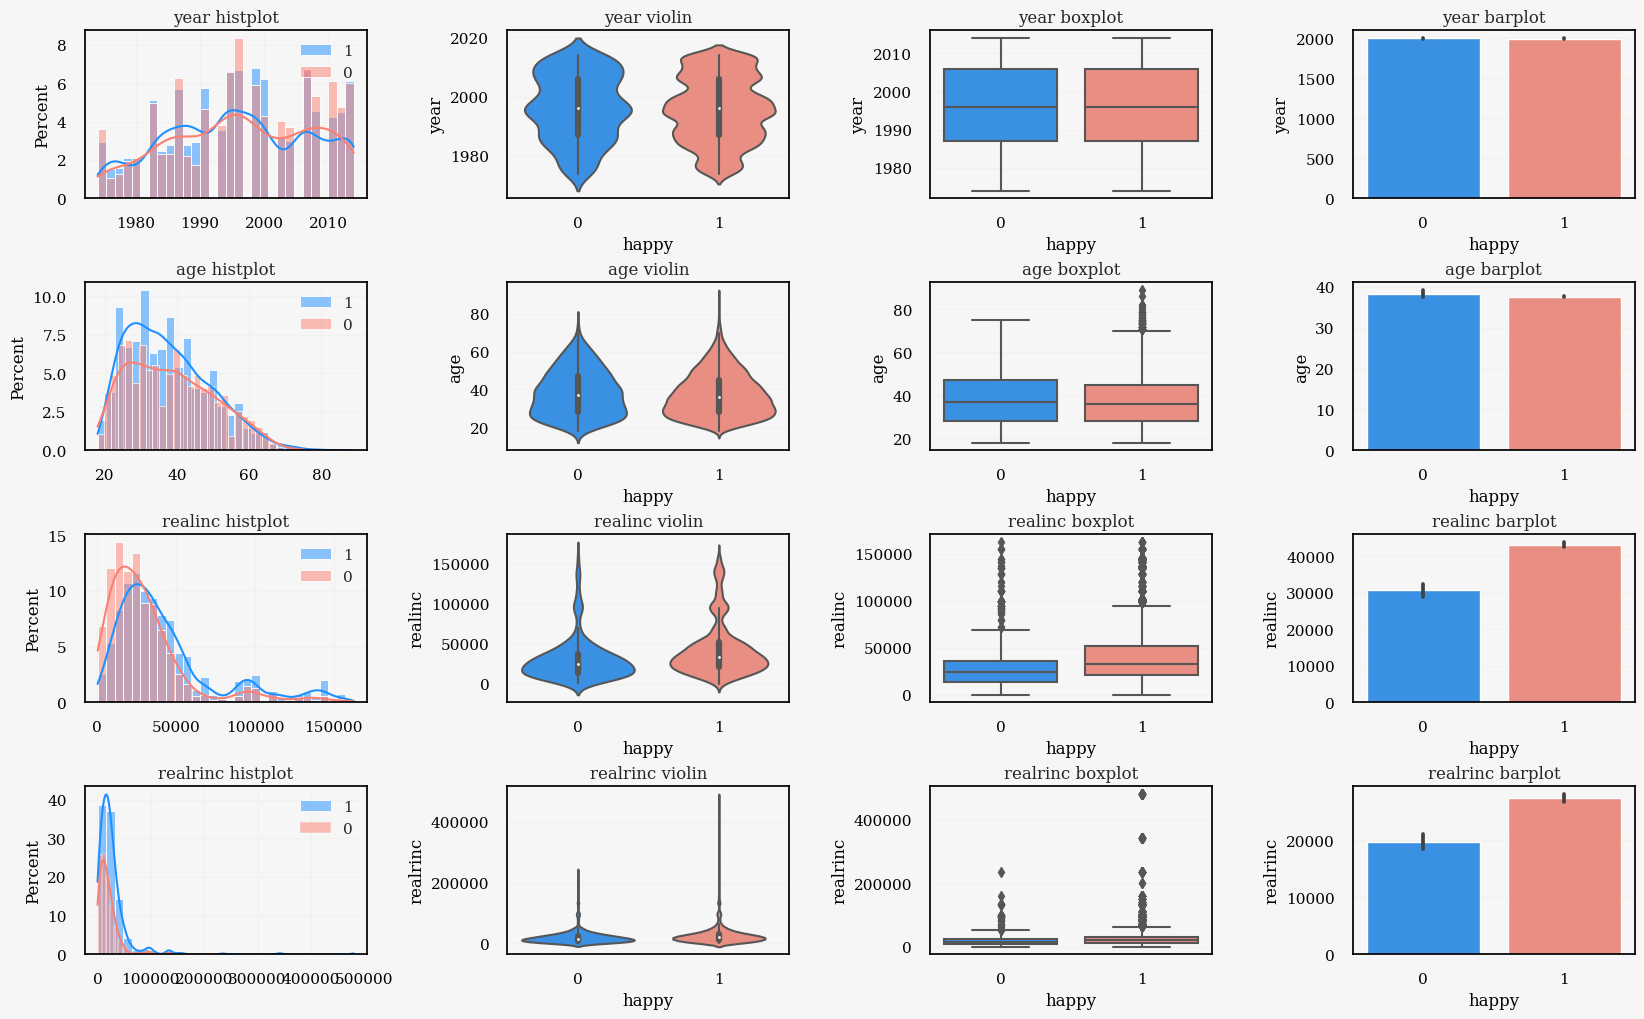

In [496]:
vis.contplot(df_clean, 'happy', 'figure4.png')

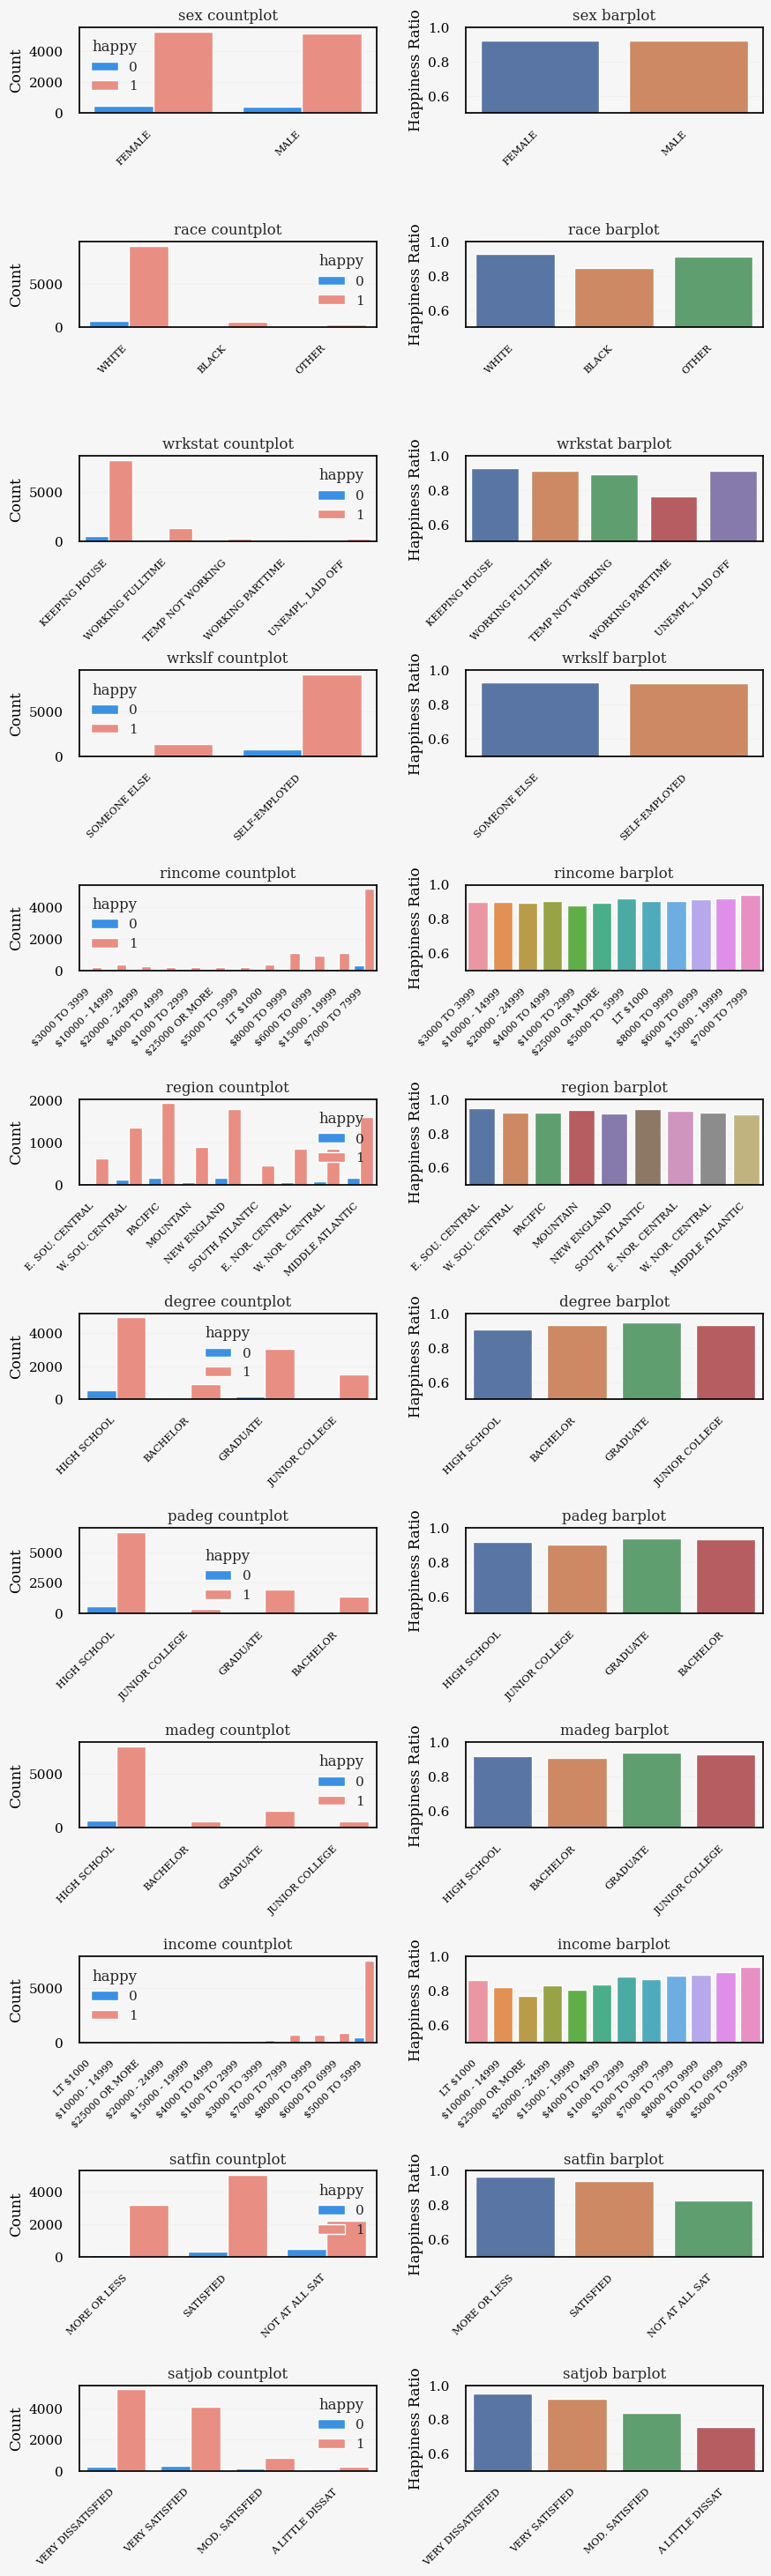

In [526]:
vis.catplot(df_clean, 'happy', variable_dicts,'figure_5.png')

## 3. Multivariate analysis <br>
Presenation of hidden patterns between variables (correlation, clustering, etc.)

### 3.1 (ex) Correlation <br>
~~

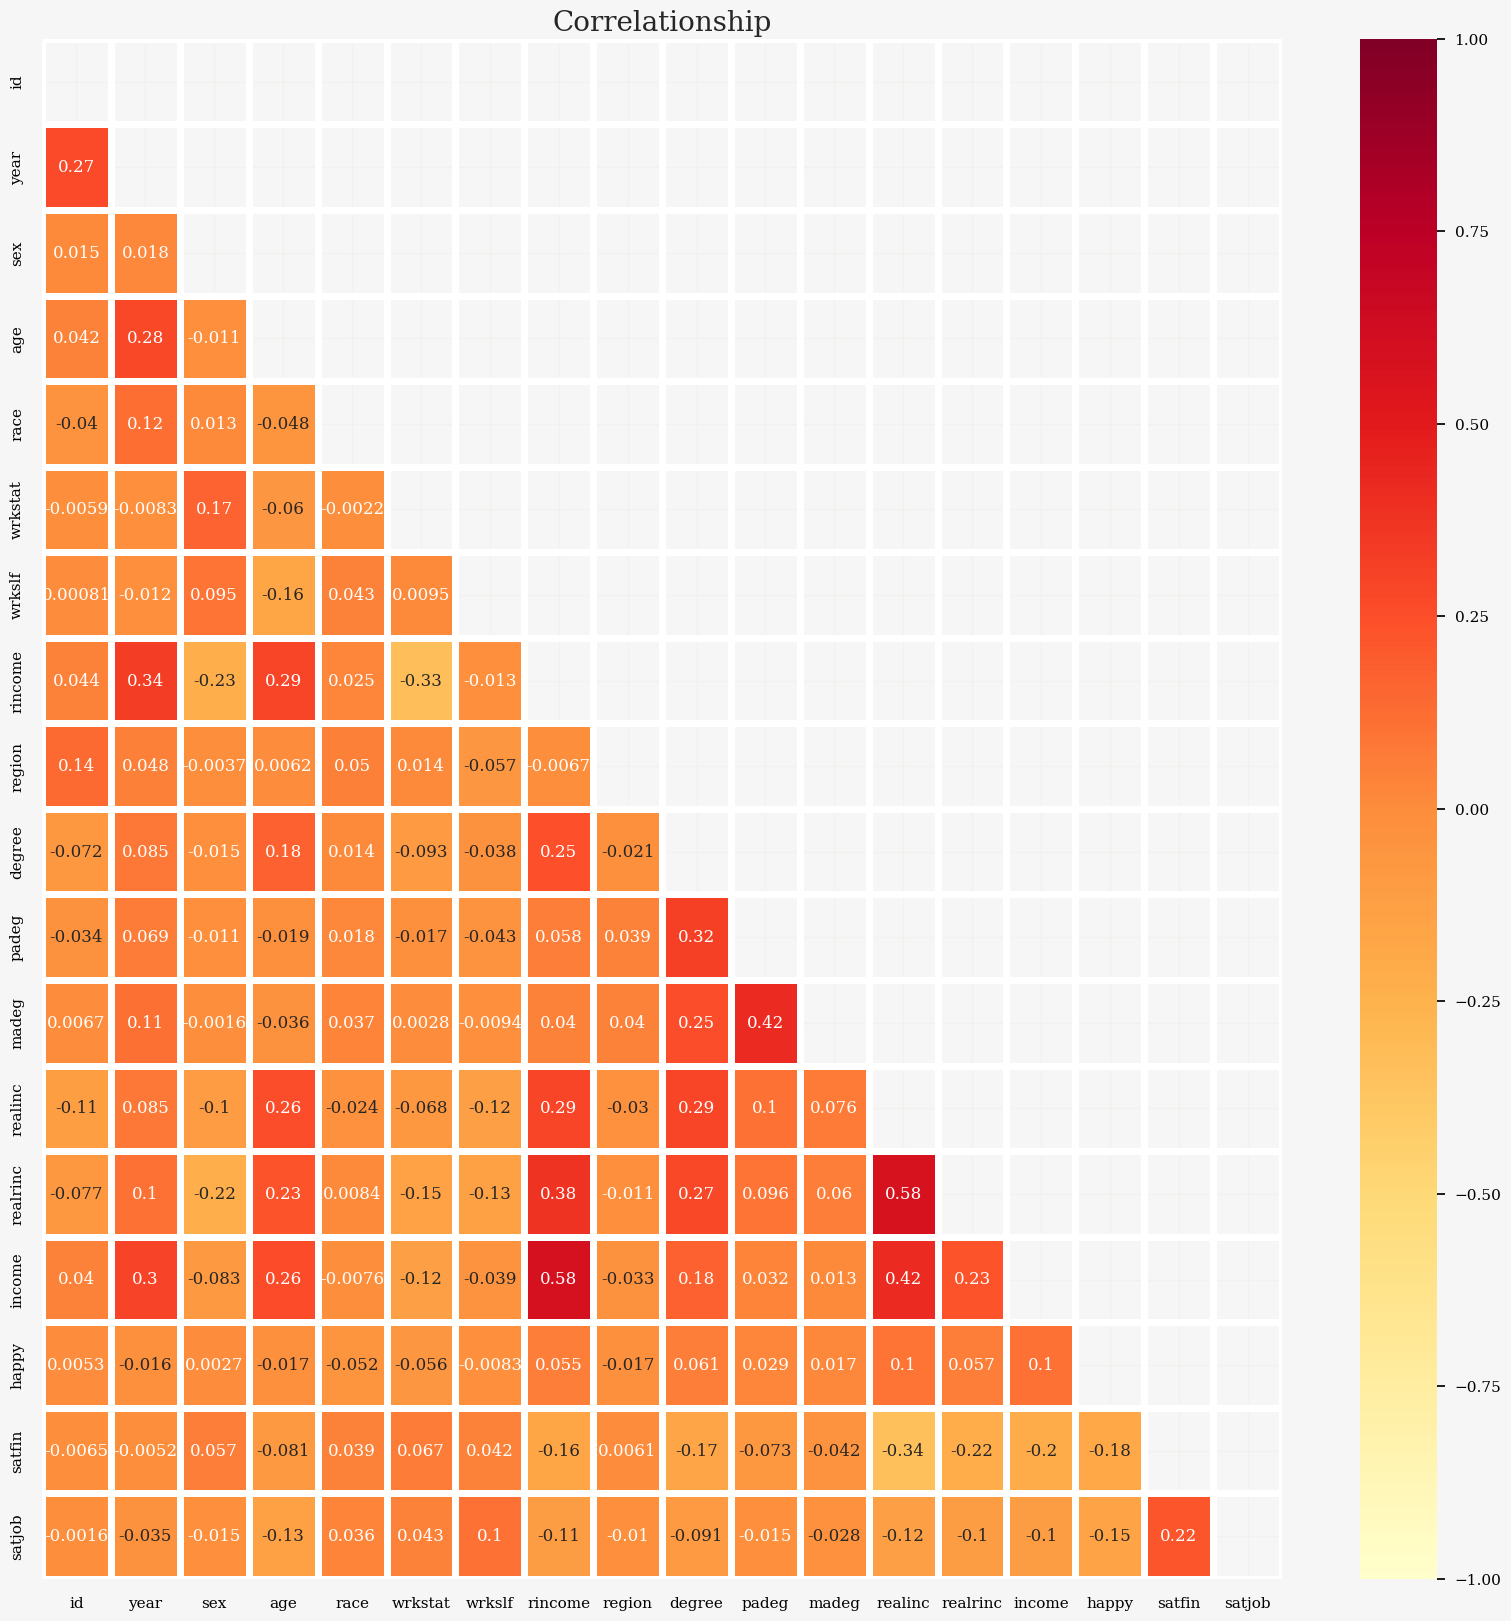

In [499]:
fig, ax = plt.subplots(figsize = (20,20))

corr = df_clean.corr()
mask = np.triu(np.ones_like(corr))

sns.heatmap(corr, mask = mask, annot = True, cmap = 'YlOrRd', linewidth = 5,
           vmin = -1, vmax = 1, ax = ax)

ax.set_title('Correlationship', fontsize = 20)
plt.savefig('figure_6.png', bbox_inches='tight')

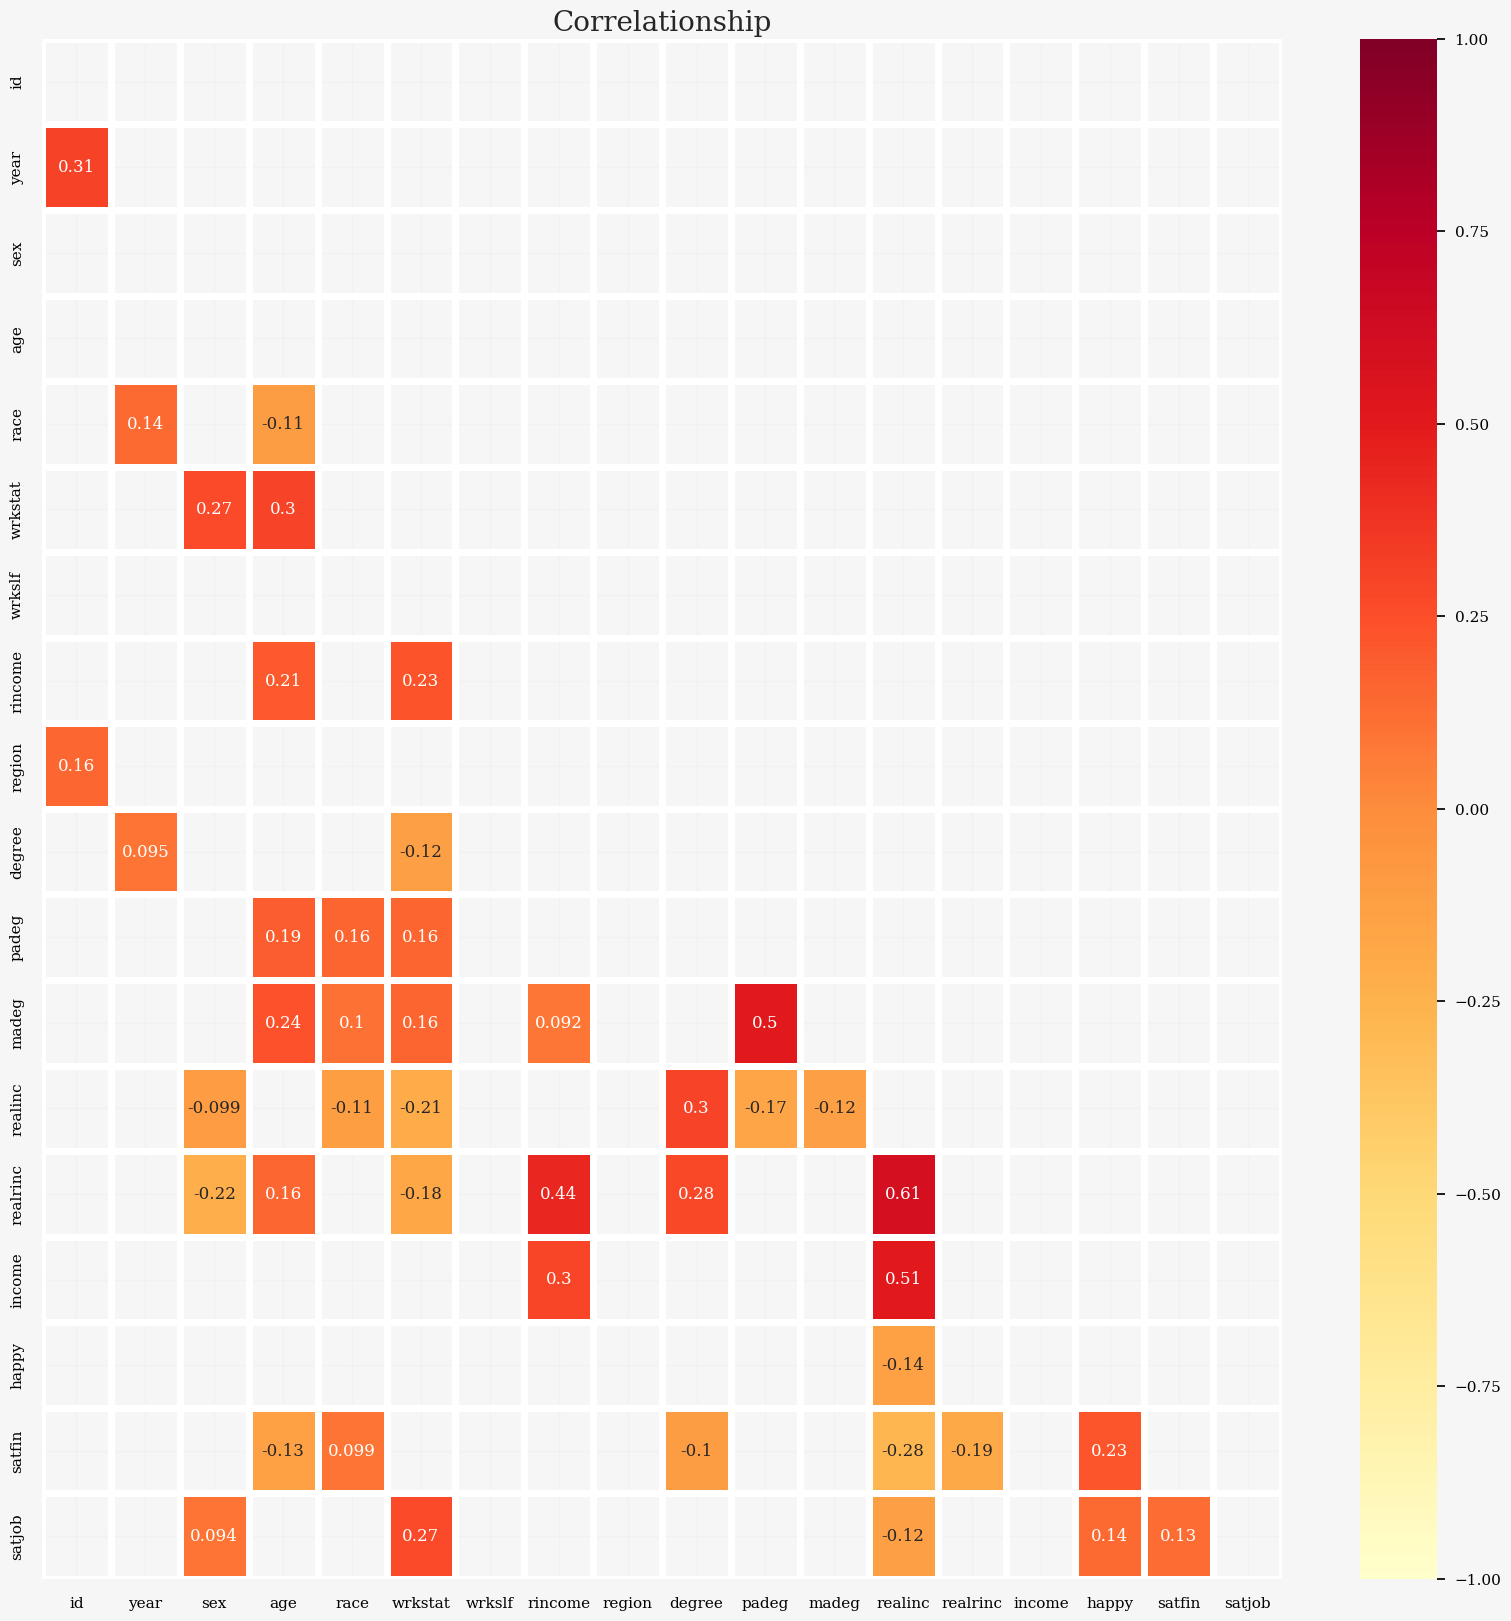

In [540]:
fig,ax = plt.subplots(figsize = (20,20))

corr = df.corr()

cond_corr = corr[np.abs(corr) >= np.mean(corr)]

mask = np.triu(np.ones_like(corr))

sns.heatmap(cond_corr, mask = mask, annot = True, cmap = 'YlOrRd', linewidth = 5,
           vmin = -1, vmax = 1, ax = ax)

ax.set_title('Correlationship', fontsize = 20)
plt.savefig('figure_7.png', bbox_inches='tight')

### 3.2 (ex) Clustering <br>
~~
* 그나마 연관 있어보이는 satjob, satfin, realinc, wrkstat, race를 대상으로

<br><br>

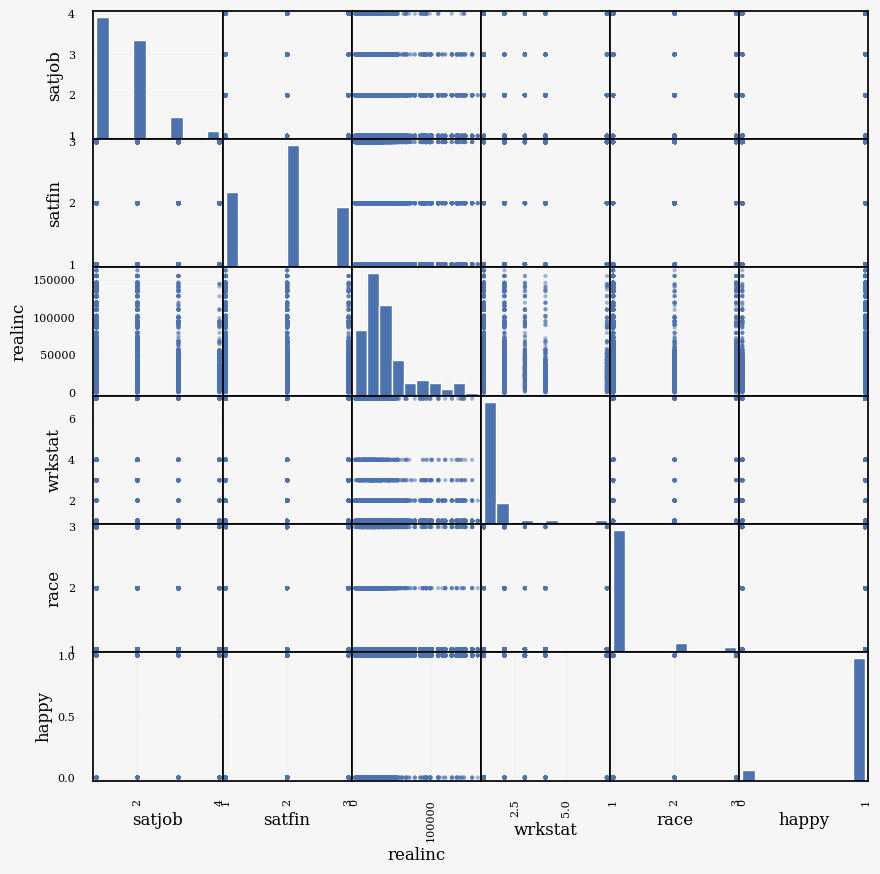

In [539]:
scatter_matrix(df_clean[['satjob', 'satfin', 'realinc', 'wrkstat', 'race', 'happy']], alpha=0.5, figsize=(10, 10))
plt.show()

## 4. Suggestion <br>
Based on the insights you obtained from the previous stages,  propose the potential project idea.